<a href="https://colab.research.google.com/github/Luk0019/aplrproject/blob/main/License_plate_detection_YOLOv4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installing/Setting-up Darknet**

In [1]:
# cloning DARKNET
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15412, done.
remote: Total 15412 (delta 0), reused 0 (delta 0), pack-reused 15412
Receiving objects: 100% (15412/15412), 14.05 MiB | 19.71 MiB/s, done.
Resolving deltas: 100% (10354/10354), done.


In [2]:
# Change directory
%cd ./darknet

/content/darknet


In [3]:
# Setting up OpenCV, CUDNN and GPU
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

In [ ]:
# Make darknet (builds darknet so darknet executable file can be used to run or train object detectors)
!make

In [5]:
# Importing packages/libraries
import os
import cv2
import numpy as np
import darknet
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as img

# **Setting-up Dataset**

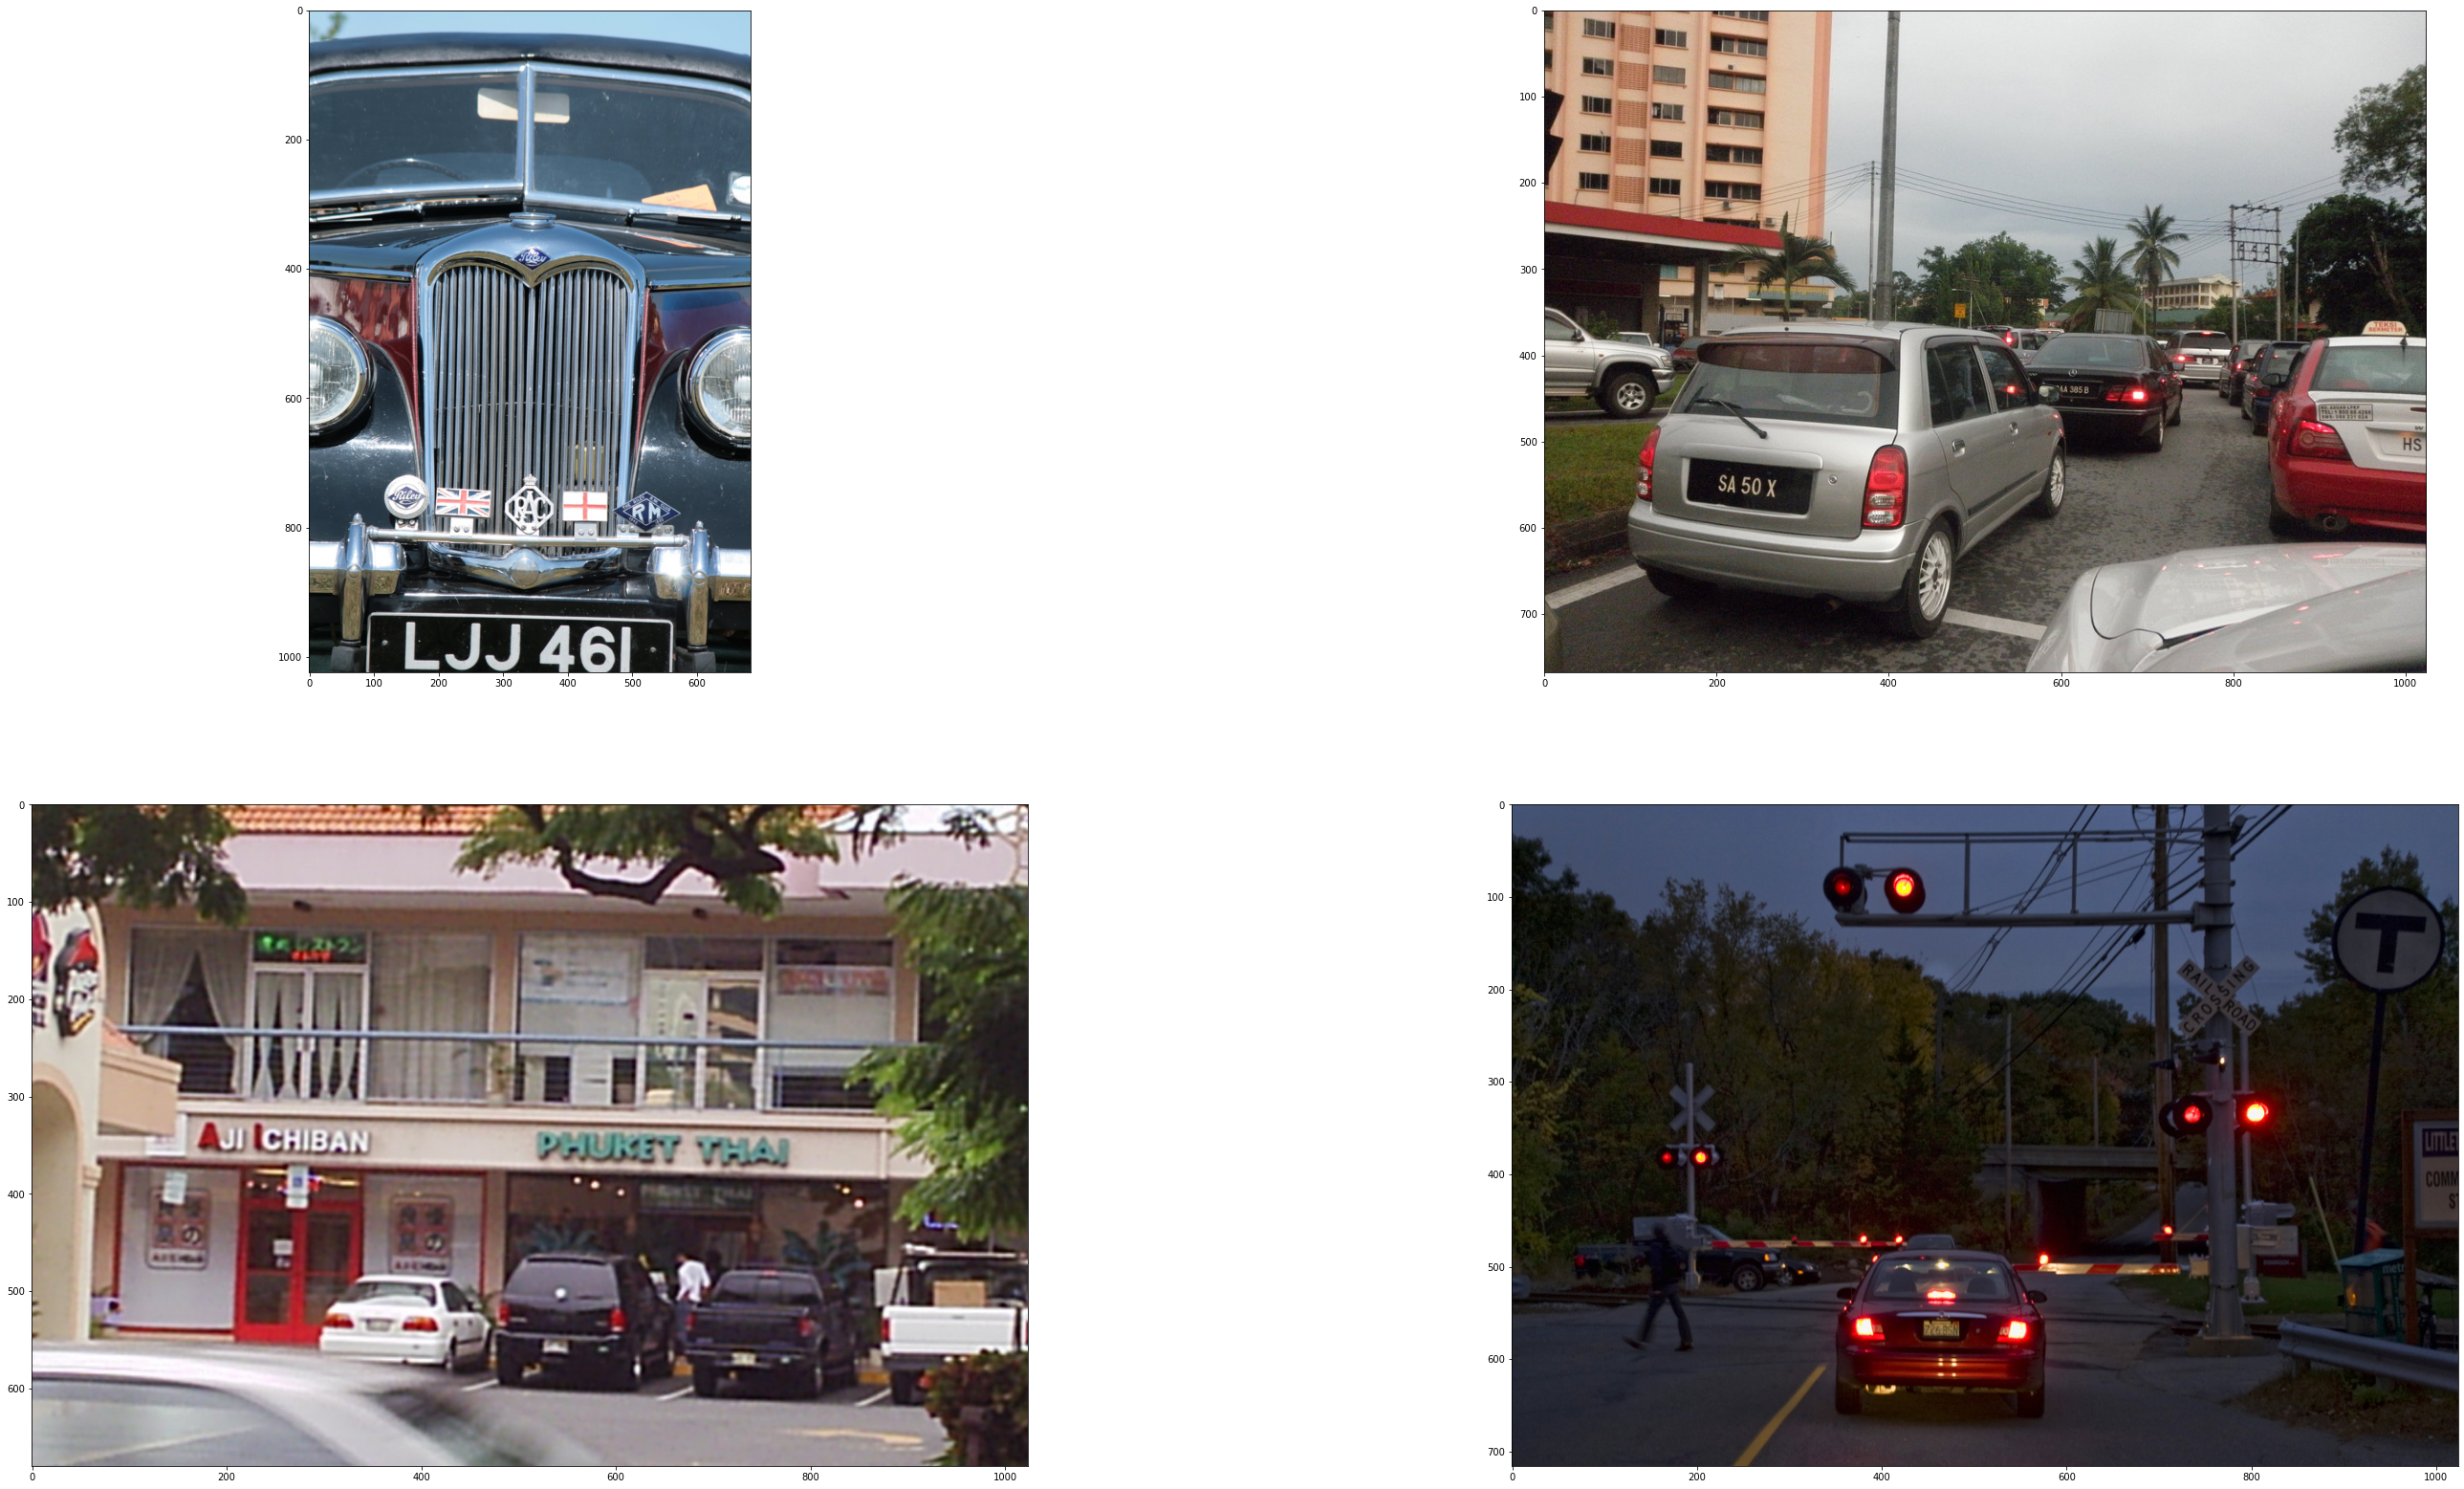

In [6]:
import math
# Creating a list of image files of the dataset.
data_path = './data/obj/train/'
files = os.listdir(data_path)
img_arr = []

# Displaying 4 images only.
num = 4

# Appending the array of images to a list.
for fimg in files:
  if fimg.endswith('.jpg'):
    demo = img.imread(data_path+fimg)
    img_arr.append(demo)
    if len(img_arr) == num:
      break

# Plotting the images using matplotlib.
_, axs = plt.subplots(math.floor(num/2), math.ceil(num/2), figsize=(50, 28))

axs = axs.flatten()

for cent, ax in zip(img_arr, axs):
  ax.imshow(cent)
plt.show()

In [7]:
# Creating a folder checkpoint to save weights while training.
%cd ../

/content


In [8]:
!mkdir checkpoint

In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

In [10]:
!./darknet detector train data/obj.data cfg/yolov4-obj.cfg yolov4.conv.137 -dont_show -map

/bin/bash: ./darknet: Is a directory
